<a href="https://colab.research.google.com/github/Biankowski/Nba-Analysis/blob/main/Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Conferir quais são os principais jogadores em cada atributo por posição
* Encontrar em qual idade se concentra os salários dos jogadores
* Nível de performance por idade
* Em quais times se concentram os dados realizados
* Checar relação entre IMC dos jogadores e performance média de forma geral e por posição
* Relação double double x salário






In [156]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [157]:
# Load the excel sheet
df = pd.read_excel('players.xlsx')

In [158]:
df.head()

,Unnamed: 0,Name,Position,Team,Age,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists
0,0,Juhann Begarin,SG,Boston Celtics,19,"6' 5""",6.50,185,NaN,NaN,NaN,NaN,NaN
1,1,Jaylen Brown,SG,Boston Celtics,24,"6' 6""",6.60,223,California,26758928.0,24.7,6.0,3.4
2,2,Kris Dunn,PG,Boston Celtics,27,"6' 3""",6.30,205,Providence,5005350.0,1.3,1.5,0.5
3,3,Carsen Edwards,PG,Boston Celtics,23,"5' 11""",5.11,200,Purdue,1782621.0,4.0,0.8,0.5
4,4,Tacko Fall,C,Boston Celtics,25,"7' 5""",7.50,311,UCF,NaN,2.5,2.7,0.2


In [159]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

In [160]:
df.head()

,Unnamed: 0,Name,Position,Team,Age,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists
0,0,Juhann Begarin,SG,Boston Celtics,19,"6' 5""",6.50,185,0,0.0,0.0,0.0,0.0
1,1,Jaylen Brown,SG,Boston Celtics,24,"6' 6""",6.60,223,California,26758928.0,24.7,6.0,3.4
2,2,Kris Dunn,PG,Boston Celtics,27,"6' 3""",6.30,205,Providence,5005350.0,1.3,1.5,0.5
3,3,Carsen Edwards,PG,Boston Celtics,23,"5' 11""",5.11,200,Purdue,1782621.0,4.0,0.8,0.5
4,4,Tacko Fall,C,Boston Celtics,25,"7' 5""",7.50,311,UCF,0.0,2.5,2.7,0.2


In [170]:
df['Height'] = df['Height'].str.replace('"', "''")

In [171]:
# This function is responseble to convert the Height that is in feet, to Meters
def height_to_meters(height_str):
    height_list = height_str.split("'")
    height_feet = int(height_list[0])
    height_inches = int(height_list[1])

    feet_to_meters = height_feet / 3.281
    inches_to_cm = height_inches / 39.37

    height_in_meters = feet_to_meters + inches_to_cm

    return round(height_in_meters, 2)

In [172]:
# Create a new column in the dataset and apply the convert function to it
df['Height_meters'] = df['Height'].apply(height_to_meters)

In [173]:
df.loc[df['Name'] == 'LeBron James']

,Unnamed: 0,Name,Position,Team,Age,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
331,331,LeBron James,SF,Los Angeles Lakers,36,6' 9'',6.9,250,0,41180544.0,25.0,7.7,7.8,2.06


In [174]:
df.loc[df['Name'] == 'Giannis Antetokounmpo']

,Unnamed: 0,Name,Position,Team,Age,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
171,171,Giannis Antetokounmpo,PF,Milwaukee Bucks,26,6' 11'',6.11,242,0,39344970.0,28.1,11.0,5.9,2.11


In [175]:
df = df.drop('Height', axis='columns')

In [176]:
df = df.drop('Height_i', axis='columns')

In [177]:
df.head()

,Unnamed: 0,Name,Position,Team,Age,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
0,0,Juhann Begarin,SG,Boston Celtics,19,185,0,0.0,0.0,0.0,0.0,1.96
1,1,Jaylen Brown,SG,Boston Celtics,24,223,California,26758928.0,24.7,6.0,3.4,1.98
2,2,Kris Dunn,PG,Boston Celtics,27,205,Providence,5005350.0,1.3,1.5,0.5,1.90
3,3,Carsen Edwards,PG,Boston Celtics,23,200,Purdue,1782621.0,4.0,0.8,0.5,1.80
4,4,Tacko Fall,C,Boston Celtics,25,311,UCF,0.0,2.5,2.7,0.2,2.26


## **Conferir quais são os principais jogadores em cada atributo por posição**

In [178]:
# Jogador com maior Salário
df.loc[df['Salary'].idxmax()]

Unnamed: 0                         287
Name                     Stephen Curry
Position                            PG
Team             Golden State Warriors
Age                                 33
Weight                             185
College                       Davidson
Salary                      45780966.0
Points                            32.0
Rebounds                           5.5
Assists                            5.8
Height_meters                      1.9
Name: 287, dtype: object

In [179]:
# Jogador com maior média de Pontos
df.loc[df['Points'].idxmax()]

Unnamed: 0                         287
Name                     Stephen Curry
Position                            PG
Team             Golden State Warriors
Age                                 33
Weight                             185
College                       Davidson
Salary                      45780966.0
Points                            32.0
Rebounds                           5.5
Assists                            5.8
Height_meters                      1.9
Name: 287, dtype: object

In [180]:
# Jogador com maior média de Rebotes
df.loc[df['Rebounds'].idxmax()]

Unnamed: 0                 191
Name              Clint Capela
Position                     C
Team             Atlanta Hawks
Age                         27
Weight                     240
College                      0
Salary              18603448.0
Points                    15.2
Rebounds                  14.3
Assists                    0.8
Height_meters             2.08
Name: 191, dtype: object

In [181]:
# Jogador com maior média de Assistências
df.loc[df['Assists'].idxmax()]

Unnamed: 0                      336
Name              Russell Westbrook
Position                         PG
Team             Los Angeles Lakers
Age                              32
Weight                          200
College                        UCLA
Salary                   44211146.0
Points                         22.2
Rebounds                       11.5
Assists                        11.7
Height_meters                   1.9
Name: 336, dtype: object

In [182]:
# Jogador mais velho
df.loc[df['Age'].idxmax()]

Unnamed: 0                 232
Name             Udonis Haslem
Position                    PF
Team                Miami Heat
Age                         41
Weight                     235
College                Florida
Salary               1669178.0
Points                     4.0
Rebounds                   1.0
Assists                    0.0
Height_meters             2.03
Name: 232, dtype: object

In [184]:
df.loc[df['Height_meters'].idxmax()]

Unnamed: 0                    4
Name                 Tacko Fall
Position                      C
Team             Boston Celtics
Age                          25
Weight                      311
College                     UCF
Salary                      0.0
Points                      2.5
Rebounds                    2.7
Assists                     0.2
Height_meters              2.26
Name: 4, dtype: object

In [129]:
top5_points = df.nlargest(5, 'Points')[['Name', 'Points', 'Position', 'Age', 'Salary']]
top5_points

,Name,Points,Position,Age,Salary
287,Stephen Curry,32.0,PG,33,45780966.0
267,Bradley Beal,31.3,SG,28,33724200.0
529,Damian Lillard,28.8,PG,31,39344900.0
69,Joel Embiid,28.5,C,27,31579390.0
171,Giannis Antetokounmpo,28.1,PF,26,39344970.0


In [127]:
top5_rebounds = df.nlargest(5, 'Rebounds')[['Name', 'Points', 'Position', 'Age', 'Salary']]
top5_rebounds

,Name,Points,Position,Age,Salary
191,Clint Capela,15.2,C,27,18603448.0
548,Rudy Gobert,14.3,C,29,35344828.0
448,Jonas Valanciunas,17.1,C,29,14000000.0
68,Andre Drummond,14.9,C,28,1669178.0
116,Nikola Vucevic,23.4,C,30,24000000.0


In [126]:
top5_assists = df.nlargest(5, 'Assists')[['Name', 'Points', 'Position', 'Age', 'Salary']]
top5_assists

,Name,Points,Position,Age,Salary
336,Russell Westbrook,22.2,PG,32,44211146.0
29,James Harden,24.6,SG,32,44310840.0
206,Trae Young,25.3,PG,22,8326471.0
288,Draymond Green,7.0,PF,31,24026712.0
348,Chris Paul,16.4,PG,36,30000000.0


In [125]:
top5_age = df.nlargest(5, 'Age')[['Name', 'Points', 'Position', 'Age', 'Salary']]
top5_age

,Name,Points,Position,Age,Salary
232,Udonis Haslem,4.0,PF,41,1669178.0
289,Andre Iguodala,4.4,F,37,1669178.0
322,Carmelo Anthony,13.4,PF,37,1669178.0
388,JJ Redick,7.4,SG,37,0.0
19,LaMarcus Aldridge,13.5,F,36,0.0


In [124]:
top5_salary = df.nlargest(5, 'Salary')[['Name', 'Points', 'Position', 'Age', 'Salary']]
top5_salary

,Name,Points,Position,Age,Salary
287,Stephen Curry,32.0,PG,33,45780966.0
29,James Harden,24.6,SG,32,44310840.0
408,John Wall,20.6,PG,31,44310840.0
336,Russell Westbrook,22.2,PG,32,44211146.0
25,Kevin Durant,26.9,PF,32,42018900.0


In [130]:
position_group = df.groupby('Position')

In [146]:
pg = position_group.get_group('PG')
sg = position_group.get_group('SG')
pf = position_group.get_group('PF')
g = position_group.get_group('G')
c = position_group.get_group('C')

In [148]:
pg.sort_values('Salary', ascending=False).nlargest(5, 'Points')

,Unnamed: 0,Name,Position,Team,Age,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
287,287,Stephen Curry,PG,Golden State Warriors,33,185,Davidson,45780966.0,32.0,5.5,5.8,1.90
529,529,Damian Lillard,PG,Portland Trail Blazers,31,195,Weber State,39344900.0,28.8,4.2,7.5,1.88
378,378,Luka Doncic,PG,Dallas Mavericks,22,230,0,10174391.0,27.7,8.0,8.6,2.01
31,31,Kyrie Irving,PG,Brooklyn Nets,29,195,Duke,35328700.0,26.9,4.8,6.0,1.88
206,206,Trae Young,PG,Atlanta Hawks,22,180,Oklahoma,8326471.0,25.3,3.9,9.4,2.08


In [149]:
sg.sort_values('Salary', ascending=False).nlargest(5, 'Points')

,Unnamed: 0,Name,Position,Team,Age,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
267,267,Bradley Beal,SG,Washington Wizards,28,207,Florida,33724200.0,31.3,4.7,4.4,1.90
113,113,Zach LaVine,SG,Chicago Bulls,26,200,UCLA,19500000.0,27.4,5.0,4.9,1.96
552,552,Donovan Mitchell,SG,Utah Jazz,25,215,Louisville,28103500.0,26.4,4.4,5.2,2.08
338,338,Devin Booker,SG,Phoenix Suns,24,206,Kentucky,31650600.0,25.6,4.2,4.3,1.96
1,1,Jaylen Brown,SG,Boston Celtics,24,223,California,26758928.0,24.7,6.0,3.4,1.98


In [150]:
pf.sort_values('Salary', ascending=False).nlargest(5, 'Points')

,Unnamed: 0,Name,Position,Team,Age,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
171,171,Giannis Antetokounmpo,PF,Milwaukee Bucks,26,242,0,39344970.0,28.1,11.0,5.9,2.11
449,449,Zion Williamson,PF,New Orleans Pelicans,21,284,Duke,10733400.0,27.0,7.2,3.7,2.01
25,25,Kevin Durant,PF,Brooklyn Nets,32,240,Texas,42018900.0,26.9,7.1,5.6,2.08
58,58,Julius Randle,PF,New York Knicks,26,250,Kentucky,21780000.0,24.1,10.2,6.0,2.03
326,326,Anthony Davis,PF,Los Angeles Lakers,28,253,Kentucky,35361360.0,21.8,7.9,3.1,2.08


In [151]:
g.sort_values('Salary', ascending=False).nlargest(5, 'Points')

,Unnamed: 0,Name,Position,Team,Age,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
47,47,Evan Fournier,G,New York Knicks,28,205,0,17000000.0,17.1,3.0,3.4,2.01
435,435,Devonte' Graham,G,New Orleans Pelicans,26,195,Kansas,11000000.0,14.8,2.7,5.4,2.08
334,334,Kendrick Nunn,G,Los Angeles Lakers,26,190,Illinois,5000000.0,14.6,3.2,2.6,1.88
177,177,George Hill,G,Milwaukee Bucks,35,188,IUPUI,4000000.0,8.7,2.0,2.4,1.93
128,128,Ricky Rubio,G,Cleveland Cavaliers,30,190,0,17800000.0,8.6,3.3,6.4,1.90


In [152]:
c.sort_values('Salary', ascending=False).nlargest(5, 'Points')

,Unnamed: 0,Name,Position,Team,Age,Weight,College,Salary,Points,Rebounds,Assists,Height_meters
69,69,Joel Embiid,C,Philadelphia Sixers,27,280,Kansas,31579390.0,28.5,10.6,2.8,2.13
480,480,Nikola Jokic,C,Denver Nuggets,26,284,0,31579390.0,26.4,10.8,8.3,2.11
499,499,Karl-Anthony Towns,C,Minnesota Timberwolves,25,248,Kentucky,31650600.0,24.8,10.6,4.5,2.11
116,116,Nikola Vucevic,C,Chicago Bulls,30,260,USC,24000000.0,23.4,11.7,3.8,2.11
410,410,Christian Wood,C,Houston Rockets,25,214,UNLV,13666667.0,21.0,9.6,1.7,2.08


# **Encontrar em qual idade se concentra os salários dos jogadores**

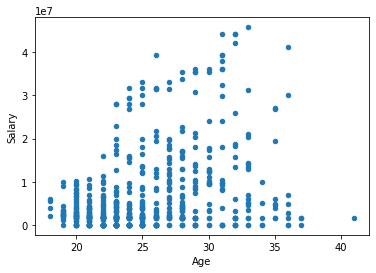

In [111]:
df.plot.scatter(x='Age', y='Salary');

# **Nível de performance por idade**